### Spanish Translation A/B Test 

* First confirm that the test is truly negative (localized tranlation is worse)

* Explain why and answer are localized tranlations really worse? 

In [75]:
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

import scipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
# print(plt.style.available)
plt.style.use('ggplot')
import seaborn as sns

# plt.rc('figure', figsize=(20, 20))
%matplotlib inline
# https://matplotlib.org/users/style_sheets.html

# Fixing random state for reproducibility
np.random.seed(1)


#### Variables

* `date`: when users came to the site for the first time since test started 

* `conversion`: label, whether users converted or not. 

* `test`: users randomly split into test (1) or control (0)

Other variables are self-explanatory.

### Load and preprocess data 

In [76]:
# load data 
test_table = pd.read_csv('data/Translation_Test/test_table.csv')
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [77]:
test_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [78]:
test_table.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [79]:
user_table = pd.read_csv('data/Translation_Test/user_table.csv')
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [80]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [81]:
user_table.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [82]:
# check if there are duplicated user_ids 
len(test_table['user_id'].unique()) == len(test_table)

True

In [83]:
len(user_table['user_id'].unique()) == len(user_table)

True

In [84]:
# check if ids in two tables are the same 
len(test_table) - len(user_table)
# test table has more user ids 

454

In [140]:
# merge two data sets 
data = pd.merge(test_table, user_table, how = 'left', on = 'user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [141]:
# convert date to datetime format 
data['date'] = pd.to_datetime(data['date'])

In [142]:
# convert object variables to categories variables
def convert_category(data, columns):
    for column in columns:
        data[column] = data[column].astype('category')
convert_category(data, ['source', 'device', 'browser_language', 'ads_channel', 
                        'browser', 'sex', 'country'])


In [143]:
data.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [144]:
# frequency table for categorical variables 
def cross_table(data, cols):
    for col in cols:
        print(pd.crosstab(index = data[col], columns = 'ratio', normalize = True))
        print('\n\n')
cross_table(data, ['source', 'device', 'browser_language', 'ads_channel', 
                        'browser', 'sex', 'country'])

col_0      ratio
source          
Ads     0.401210
Direct  0.200375
SEO     0.398415



col_0      ratio
device          
Mobile  0.445062
Web     0.554938



col_0                ratio
browser_language          
EN                0.139277
ES                0.832847
Other             0.027876



col_0           ratio
ads_channel          
Bing         0.075265
Facebook     0.376216
Google       0.374869
Other        0.022807
Yahoo        0.150844



col_0           ratio
browser              
Android_App  0.342219
Chrome       0.224849
FireFox      0.089927
IE           0.136140
Iphone_App   0.102843
Opera        0.013434
Safari       0.090587



col_0     ratio
sex            
F      0.415976
M      0.584024



col_0           ratio
country              
Argentina    0.103194
Bolivia      0.024564
Chile        0.043582
Colombia     0.119373
Costa Rica   0.011723
Ecuador      0.035099
El Salvador  0.018052
Guatemala    0.033398
Honduras     0.018919
Mexico       0.283712
Nicaragua    0

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null category
device              453321 non-null category
browser_language    453321 non-null category
ads_channel         181877 non-null category
browser             453321 non-null category
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null category
age                 452867 non-null float64
country             452867 non-null category
dtypes: category(7), datetime64[ns](1), float64(1), int64(3)
memory usage: 23.8 MB


### Is the ab test results really negative?

Visulize the conversion rate and perform t-test.

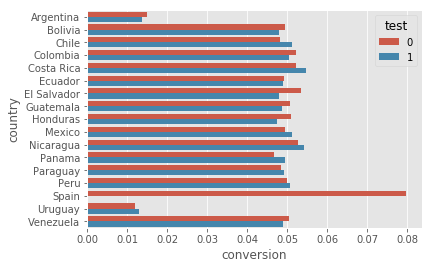

In [176]:
g = data.groupby(['country', 'test'])['conversion'].mean().reset_index()
sns.barplot(x = 'conversion', y = 'country', hue = 'test', data = g, orient = 'h')


https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test


scipy ttest documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_ind.html?highlight=ttest#scipy.stats.mstats.ttest_ind

#### T test 

In [179]:
# t test with equal variance of two samples  
scipy.stats.ttest_ind(data[data['test'] == 1]['conversion'].values, 
                      data[data['test'] == 0]['conversion'].values)

Ttest_indResult(statistic=-18.214958485293973, pvalue=4.1743494389297265e-74)

In [180]:
# t test 
scipy.stats.ttest_ind(data[data['test'] == 1]['conversion'].values, 
                      data[data['test'] == 0]['conversion'].values, equal_var = False)

Ttest_indResult(statistic=-18.312271285740266, pvalue=7.030776744312677e-75)

### Explaination

* Is the ab test run long enough? 

* Is the sample really random? 


In [181]:
# check mean conversion rate of two groups as a function of time 

day_by_day = data.groupby(['date', 'test'])['conversion'].mean().reset_index()
day_by_day

,date,test,conversion
0,2015-11-30,0,0.057374
1,2015-11-30,1,0.043886
2,2015-12-01,0,0.053616
3,2015-12-01,1,0.041387
4,2015-12-02,0,0.055364
5,2015-12-02,1,0.044234
6,2015-12-03,0,0.056094
7,2015-12-03,1,0.043884
8,2015-12-04,0,0.054122
9,2015-12-04,1,0.043491


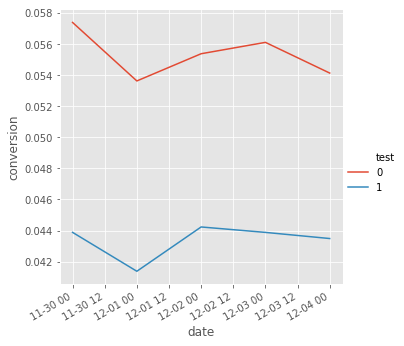

In [182]:
g = sns.relplot(x = 'date', y = 'conversion', hue = 'test', kind = "line", data = day_by_day)
g.fig.autofmt_xdate()

The test should be run at least one full week or two weeks to capture weekly patterns.

#### Is the sample really random? 

Build a decision tree with existing features as input and test = 0 /1 as output. If the test is really random, the tree shouldn't be able to split.

In [183]:
# 
orig_data = data.copy()

In [184]:
# encode object/categorical variables 
data['source'], _ = pd.factorize(data['source'])
data['device'], _ = pd.factorize(data['device'])
data['browser_language'], _ = pd.factorize(data['browser_language'])
data['ads_channel'], _ = pd.factorize(data['ads_channel'])
data['browser'], _ = pd.factorize(data['browser'])
data['sex'], _ = pd.factorize(data['sex'])
data['country'], country_map = pd.factorize(data['country'])

In [185]:
# data = pd.concat([data, pd.get_dummies(data['country'])], axis = 1)
country_map

CategoricalIndex(['Spain', 'Mexico', 'Venezuela', 'Bolivia', 'Colombia',
                  'Uruguay', 'El Salvador', 'Nicaragua', 'Peru', 'Costa Rica',
                  'Chile', 'Argentina', 'Ecuador', 'Guatemala', 'Honduras',
                  'Paraguay', 'Panama'],
                 categories=['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', ...], ordered=False, dtype='category')

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null int64
device              453321 non-null int64
browser_language    453321 non-null int64
ads_channel         453321 non-null int64
browser             453321 non-null int64
conversion          453321 non-null int64
test                453321 non-null int64
sex                 453321 non-null int64
age                 452867 non-null float64
country             453321 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 45.0 MB


In [187]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,0,0,0,-1,0,1,0,0,32.0,0
1,497851,2015-12-04,1,0,0,0,0,0,1,0,21.0,1
2,848402,2015-12-04,1,0,0,1,1,0,0,0,34.0,0
3,290051,2015-12-03,1,1,1,1,2,0,1,1,22.0,1
4,548435,2015-11-30,1,0,0,0,3,0,1,0,19.0,1


#### Decision tree

In [189]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(data.drop(['user_id', 'date', 'test', 'ads_channel', 'sex', 'age'], axis = 1), data['test'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

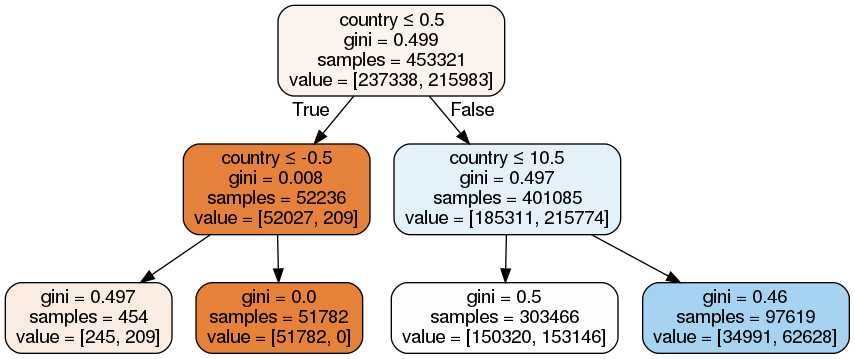

In [190]:
# ! dot -Tsvg abtest.dot -o abtest.svg
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
abtest_tree = StringIO()
export_graphviz(tree_clf, out_file=abtest_tree,  
                feature_names = data.drop(['user_id', 'date', 'test', 'ads_channel', 'sex', 'age'], axis = 1).columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(abtest_tree.getvalue())  
Image(graph.create_png())

# ! sfdp -Tsvg -Goverlap=prism abtest.dot -o abtest.svg -v

In [132]:
# abtest by country 
country_map

CategoricalIndex(['Spain', 'Mexico', 'Venezuela', 'Bolivia', 'Colombia',
                  'Uruguay', 'El Salvador', 'Nicaragua', 'Peru', 'Costa Rica',
                  'Chile', 'Argentina', 'Ecuador', 'Guatemala', 'Honduras',
                  'Paraguay', 'Panama'],
                 categories=['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', ...], ordered=False, dtype='category')

##### The tree was split by country. Check t-test by country.

In [191]:
data = orig_data.copy()
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [192]:
# t test by country
for country in data['country'].unique().dropna():
    temp = data[data['country'] == country]
    print('Counrty', country)
    print(scipy.stats.ttest_ind(temp[temp['test'] == 1]['conversion'].values, 
                      temp[temp['test'] == 0]['conversion'].values, equal_var = False))
    print('\n')
    

Counrty Spain
Ttest_indResult(statistic=nan, pvalue=nan)


Counrty Mexico
Ttest_indResult(statistic=1.3866735952325449, pvalue=0.16554372211039645)


Counrty Venezuela
Ttest_indResult(statistic=-0.562614246909357, pvalue=0.5737015234387255)


Counrty Bolivia
Ttest_indResult(statistic=-0.3599581772440242, pvalue=0.7188852468451075)


Counrty Colombia
Ttest_indResult(statistic=-0.7999917822370824, pvalue=0.4237190741314115)


Counrty Uruguay
Ttest_indResult(statistic=0.15134316107212104, pvalue=0.8797639736514224)


Counrty El Salvador
Ttest_indResult(statistic=-1.1549940887832975, pvalue=0.2481266743266678)


Counrty Nicaragua
Ttest_indResult(statistic=0.27880850314757355, pvalue=0.7804003858904794)


Counrty Peru
Ttest_indResult(statistic=0.28982358545511927, pvalue=0.7719529885153548)


Counrty Costa Rica
Ttest_indResult(statistic=0.40176067651471453, pvalue=0.6878763537073986)


Counrty Chile
Ttest_indResult(statistic=1.030372864438366, pvalue=0.30284764308444695)


Counrty Argentina

The differences between test and control groups are not significant anymore, that is, localized translation doesn't do worse.